IMPORTING PACKAGES

In [1]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

LOADING AND PREPARING DATASET

In [2]:
#loading the csv file and displaying the first few rows of the dataset

stock_df=pd.read_csv("Stock Market Dataset.csv")
stock_df.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [3]:
#Dropping the extra column

stock_df.drop(columns=['Unnamed: 0'], inplace=True)
stock_df.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [4]:
stock_df.shape  #displays the number of rows and columns of the dataset

(1243, 38)

In [5]:
stock_df.columns

Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Natural_Gas_Vol.   1239 non-null   float64
 3   Crude_oil_Price    1243 non-null   float64
 4   Crude_oil_Vol.     1220 non-null   float64
 5   Copper_Price       1243 non-null   float64
 6   Copper_Vol.        1206 non-null   float64
 7   Bitcoin_Price      1243 non-null   object 
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   object 
 10  Platinum_Vol.      636 non-null    float64
 11  Ethereum_Price     1243 non-null   object 
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   object 
 14  Nasdaq_100_Price   1243 non-null   object 
 15  Nasdaq_100_Vol.    1242 non-null   float64
 16  Apple_Price        1243 

In [7]:
stock_df.describe(include ='all')  #includes the NaN values as well

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
count,1243,1243.000000,1239.000000,1243.000000,1.220000e+03,1243.000000,1206.000000,1243,1.243000e+03,1243,...,1243,1243.000000,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243,1241.000000
unique,1243,NaN,NaN,NaN,NaN,NaN,NaN,1238,NaN,1095,...,1208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1122,NaN
top,04-02-2019,NaN,NaN,NaN,NaN,NaN,NaN,"21,365.20",NaN,941.4,...,"4,71,500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,929.50",NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
mean,NaN,3.494714,131624.116223,67.577064,3.989038e+05,3.541957,35406.616915,NaN,4.033918e+07,NaN,...,NaN,2426.524537,404.839541,7.057401e+06,128.683234,7.413005e+07,239.728134,2.325851e+07,NaN,211127.671233
std,NaN,1.822540,64385.141749,20.465500,2.161619e+05,0.702819,38415.448731,NaN,2.940889e+08,NaN,...,NaN,2660.497572,114.989473,6.384187e+06,30.808631,3.245753e+07,71.015427,1.555486e+07,NaN,115006.351292
min,NaN,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,NaN,2.600000e+02,NaN,...,NaN,80.000000,166.370000,1.140000e+06,79.410000,1.763000e+07,88.910000,5.470000e+06,NaN,0.000000
25%,NaN,2.347500,91900.000000,55.095000,2.835975e+05,2.858750,370.000000,NaN,7.907500e+04,NaN,...,NaN,345.000000,323.010000,3.990000e+06,96.260000,5.264500e+07,183.355000,1.478500e+07,NaN,152200.000000
50%,NaN,2.702000,127370.000000,69.230000,3.668850e+05,3.666000,10180.000000,NaN,2.153100e+05,NaN,...,NaN,1510.000000,384.150000,5.610000e+06,128.730000,6.520000e+07,224.430000,1.934000e+07,NaN,197970.000000
75%,NaN,4.055500,169460.000000,80.455000,5.072425e+05,4.137250,68340.000000,NaN,6.151050e+05,NaN,...,NaN,3225.000000,495.365000,7.910000e+06,158.110000,8.674500e+07,301.650000,2.711500e+07,NaN,257920.000000


In [8]:
stock_df.isnull().any()

Date                 False
Natural_Gas_Price    False
Natural_Gas_Vol.      True
Crude_oil_Price      False
Crude_oil_Vol.        True
Copper_Price         False
Copper_Vol.           True
Bitcoin_Price        False
Bitcoin_Vol.         False
Platinum_Price       False
Platinum_Vol.         True
Ethereum_Price       False
Ethereum_Vol.        False
S&P_500_Price        False
Nasdaq_100_Price     False
Nasdaq_100_Vol.       True
Apple_Price          False
Apple_Vol.           False
Tesla_Price          False
Tesla_Vol.           False
Microsoft_Price      False
Microsoft_Vol.       False
Silver_Price         False
Silver_Vol.           True
Google_Price         False
Google_Vol.          False
Nvidia_Price         False
Nvidia_Vol.          False
Berkshire_Price      False
Berkshire_Vol.       False
Netflix_Price        False
Netflix_Vol.         False
Amazon_Price         False
Amazon_Vol.          False
Meta_Price           False
Meta_Vol.            False
Gold_Price           False
G

In [9]:
stock_df.isnull().sum()

Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

In [10]:
stock_df.dtypes

Date                  object
Natural_Gas_Price    float64
Natural_Gas_Vol.     float64
Crude_oil_Price      float64
Crude_oil_Vol.       float64
Copper_Price         float64
Copper_Vol.          float64
Bitcoin_Price         object
Bitcoin_Vol.         float64
Platinum_Price        object
Platinum_Vol.        float64
Ethereum_Price        object
Ethereum_Vol.        float64
S&P_500_Price         object
Nasdaq_100_Price      object
Nasdaq_100_Vol.      float64
Apple_Price          float64
Apple_Vol.           float64
Tesla_Price          float64
Tesla_Vol.           float64
Microsoft_Price      float64
Microsoft_Vol.       float64
Silver_Price         float64
Silver_Vol.          float64
Google_Price         float64
Google_Vol.          float64
Nvidia_Price         float64
Nvidia_Vol.          float64
Berkshire_Price       object
Berkshire_Vol.       float64
Netflix_Price        float64
Netflix_Vol.         float64
Amazon_Price         float64
Amazon_Vol.          float64
Meta_Price    

In [11]:
#Converting the object data types to float so as to have a uniform dataset
stock_df[['Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price','S&P_500_Price','Nasdaq_100_Price','Berkshire_Price','Gold_Price']] = stock_df[['Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price','S&P_500_Price','Nasdaq_100_Price','Berkshire_Price','Gold_Price']].replace({',': ''}, regex=True).astype(float)

EXPLORATORY DATA ANALYSIS (EDA)

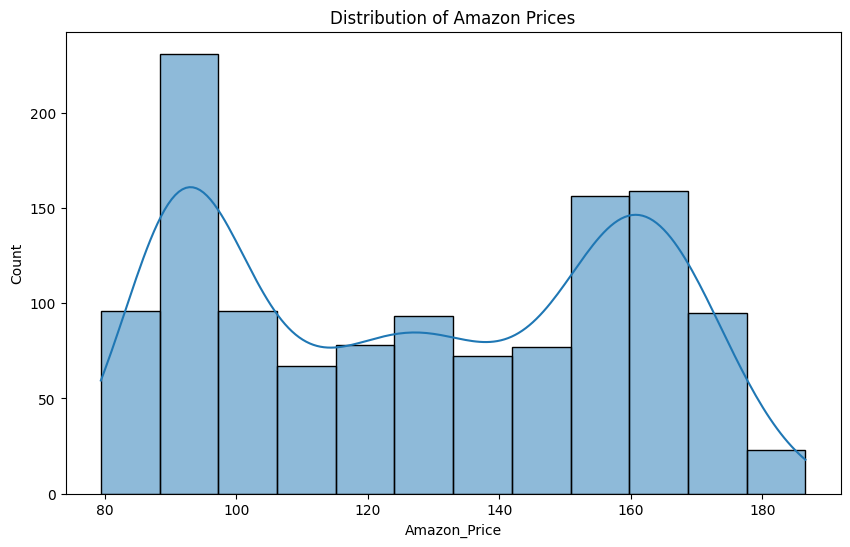

In [12]:
# Visualizing the distribution of the target variable (Amazon_Price)
plt.figure(figsize=(10, 6))
sns.histplot(stock_df['Amazon_Price'], kde=True)
plt.title('Distribution of Amazon Prices')
plt.show()


In [ ]:
# Analyzing relationships between Amazon_Price and other features
for column in stock_df.columns:
    if column != 'Amazon_Price':
        sns.scatterplot(x=stock_df[column], y=stock_df['Amazon_Price'])
        plt.title(f'Scatter plot of {column} vs Amazon_Price')
        plt.show()

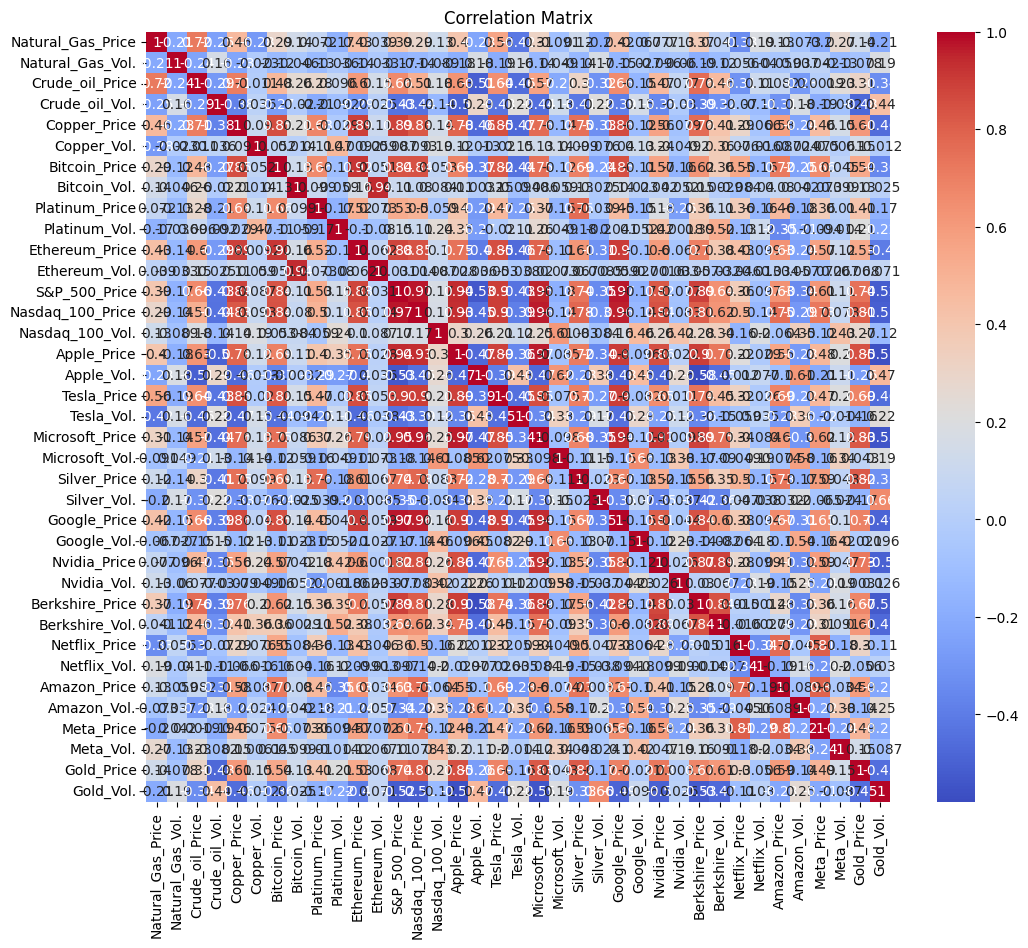

In [39]:
# Computing and visualizing the correlation matrix
df_numeric = stock_df.drop(columns=['Date'])
plt.figure(figsize=(12, 10))
corr_mat = df_numeric.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

FEATURE ENGINEERING

In [31]:
# Filling missing values with the mean of their respective columns
df_numeric.fillna(df_numeric.mean(), inplace=True)

In [32]:
# Standardizing the features (excluding the target 'Amazon_Price')
features = df_numeric.drop(columns=['Amazon_Price', 'Amazon_Vol.'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Converting the scaled features back to a DataFrame for easier handling
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['Amazon_Price'] = df_numeric['Amazon_Price']


MODEL DEVELOPMENT

In [33]:
# Defining the features (X) and the target variable (y)
X = df_scaled.drop(columns=['Amazon_Price'])
y = df_scaled['Amazon_Price']

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.head()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Nvidia_Price,Nvidia_Vol.,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
1072,-0.654139,1.179446,-0.724782,0.701265,-1.373533,0.375516,-1.063707,-0.135165,-0.714588,0.000000,...,-1.048877,0.172720,-1.083603,-0.859781,-1.134295,-0.040335,-0.845905,-0.893875,-1.254308,0.406140
96,-0.466962,-0.059825,1.133726,-0.391955,0.368726,0.547101,0.084824,-0.137098,-0.273259,3.492412,...,1.869733,0.271738,1.797958,2.223590,-0.068726,0.323209,0.853424,0.313307,0.920149,-0.098876
1183,-0.504836,-0.581648,-0.179255,1.642428,-0.908077,0.775001,-1.243316,-0.134849,-0.626137,0.000000,...,-1.055042,-0.498459,-0.917275,-0.837220,-0.298404,-0.499466,-0.652630,0.014888,-2.330709,0.246478
881,-0.959879,0.104674,-1.333857,0.131111,-0.867509,1.261204,-0.997874,-0.135678,-1.066539,0.000000,...,-0.620356,0.463885,-1.384060,-0.750735,1.044346,1.257142,0.000026,0.007813,0.266532,0.366355
178,-0.495505,0.850758,0.209360,-1.485735,0.210016,0.659465,0.098991,-0.137006,0.993767,0.000000,...,0.961883,1.514007,1.159284,1.298579,-0.291879,2.150332,0.100327,-0.028846,0.970844,-1.837837


In [34]:
y_train.head()

1072     86.63
96      140.39
1183     96.33
881     154.20
178     118.15
Name: Amazon_Price, dtype: float64

TRAINING THE MODEL

In [35]:
# Initializing a Linear Regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Predicting on the testing data
y_pred = model.predict(X_test)

# Evaluating the model using MAE, MSE and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 5.094387862758271
Mean Squared Error: 42.55004809953231
Root Mean Squared Error: 6.523039789816732


MODEL VALIDATION AND TESTING

In [36]:
# Performing 5-fold cross-validation to assess model performance
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Calculating mean and standard deviation of cross-validation scores
mean_cv = -cv_scores.mean()
std_cv = cv_scores.std()

print(f"Mean CV MAE: {mean_cv}")
print(f"Standard Deviation CV MAE: {std_cv}")

Mean CV MAE: 5.102945329798635
Standard Deviation CV MAE: 0.25101112275192217


TESTING MODEL ON UNSEEN DATA

In [37]:
# Using a portion of the testing data as recent data for validation
recent_data = X_test[-20:]  # Last 20 samples as recent data
recent_target = y_test[-20:]

# Predicting and evaluate on recent data
recent_predictions = model.predict(recent_data)

recent_mae = mean_absolute_error(recent_target, recent_predictions)
recent_rmse = np.sqrt(mean_squared_error(recent_target, recent_predictions))

print(f"Recent Data MAE: {recent_mae}")
print(f"Recent Data RMSE: {recent_rmse}")

Recent Data MAE: 5.012304493638301
Recent Data RMSE: 6.134705773038958


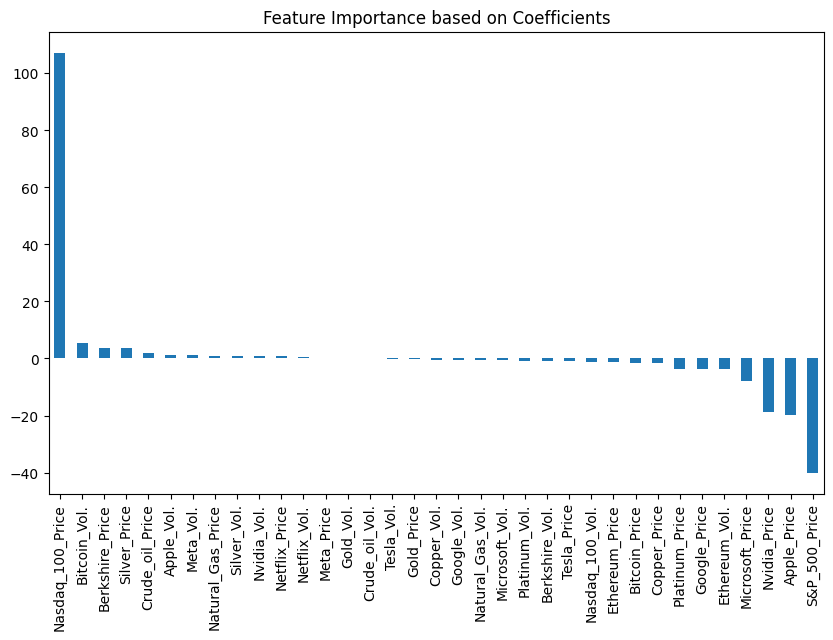

In [38]:
# Getting the coefficients from the linear regression model
feature_importances = pd.Series(model.coef_, index=X_train.columns)

# Sorting and visualizing the feature importances
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance based on Coefficients')
plt.show()
